In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [2]:
from sklearn.datasets import make_blobs, make_circles, make_moons

In [3]:
rng = np.random.RandomState(6)
X_blobs, y_blobs = make_blobs(n_samples=200, random_state=1)
X_blobs = scale(X_blobs @ rng.normal(0, 4, size=(2, 2)))
X_circles, y_circles = make_circles(n_samples=400, random_state=0, noise=.09, factor=.4)
X_circles = scale(X_circles)
X_moons, y_moons = make_moons(n_samples=200, random_state=0, noise=.09)
X_moons = scale(X_moons)


In [4]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import adjusted_rand_score, silhouette_score, normalized_mutual_info_score, adjusted_mutual_info_score

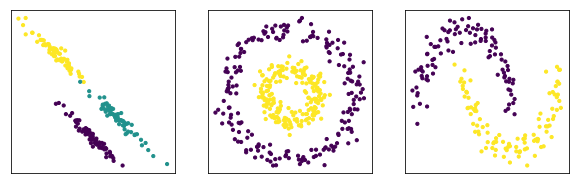

In [5]:
fig, axes = plt.subplots(1, 3, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 3))
for ax, (X, y) in zip(axes, [(X_blobs, y_blobs), (X_circles, y_circles), (X_moons, y_moons)]):
    ax.scatter(X[:, 0], X[:, 1], c=y, s=10)

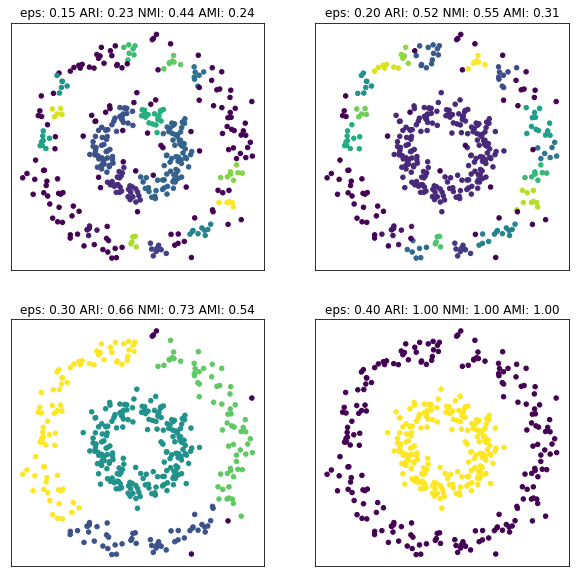

In [6]:
fig, axes = plt.subplots(2, 2, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 10))
for ax, eps in zip(axes.ravel(), [.15, .2, .3, .4]):
    dbs = DBSCAN(eps=eps).fit(X_circles)
    ari = adjusted_rand_score(y_circles, dbs.labels_)
    nmi = normalized_mutual_info_score(y_circles, dbs.labels_)
    ami = adjusted_mutual_info_score(y_circles, dbs.labels_)
    ax.set_title("eps: {:.2f} ARI: {:.2f} NMI: {:.2f} AMI: {:.2f}".format(eps, ari, nmi, ami))
    ax.scatter(X_circles[:, 0], X_circles[:, 1], c=dbs.labels_, s=20)

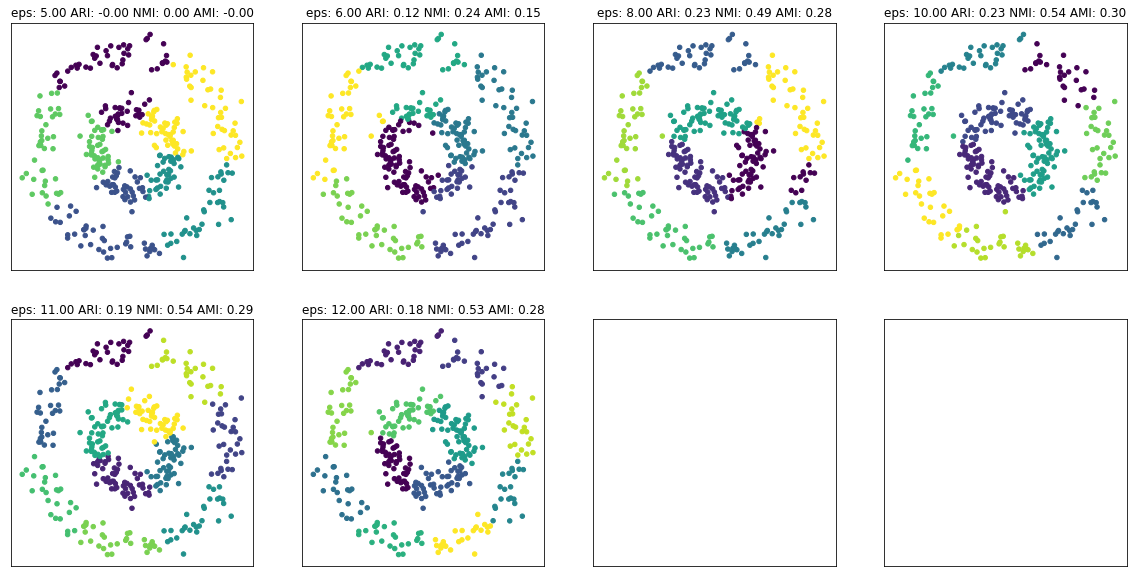

In [7]:
fig, axes = plt.subplots(2, 4, subplot_kw={'xticks': (), 'yticks':()}, figsize=(20, 10))
for ax, eps in zip(axes.ravel(), [5, 6, 8, 10, 11, 12]):
    dbs = KMeans(n_clusters=eps).fit(X_circles)
    ari = adjusted_rand_score(y_circles, dbs.labels_)
    nmi = normalized_mutual_info_score(y_circles, dbs.labels_)
    ami = adjusted_mutual_info_score(y_circles, dbs.labels_)
    ax.set_title("eps: {:.2f} ARI: {:.2f} NMI: {:.2f} AMI: {:.2f}".format(eps, ari, nmi, ami))
    ax.scatter(X_circles[:, 0], X_circles[:, 1], c=dbs.labels_, s=20)

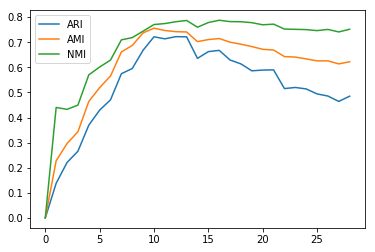

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
aris, nmis, amis = [], [], []
for i in range(1, 30):
    km = KMeans(n_clusters=i).fit(digits.data)
    ari = adjusted_rand_score(digits.target, km.labels_)
    nmi = normalized_mutual_info_score(digits.target, km.labels_)
    ami = adjusted_mutual_info_score(digits.target, km.labels_)
    aris.append(ari)
    nmis.append(nmi)
    amis.append(ami)
plt.plot(aris, label="ARI")
plt.plot(amis, label="AMI")
plt.plot(nmis, label="NMI")
plt.legend()

Text(0.5,0,'n_clusters')

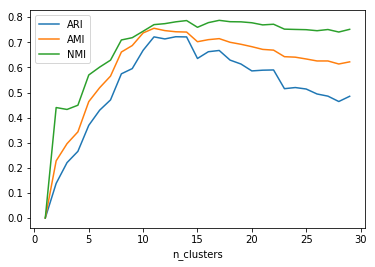

In [9]:
plt.plot(range(1, 30), aris, label="ARI")
plt.plot(range(1, 30), amis, label="AMI")
plt.plot(range(1, 30), nmis, label="NMI")
plt.legend()
plt.xlabel("n_clusters")

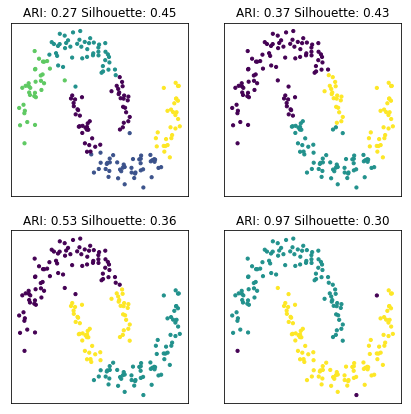

In [10]:
fig, axes = plt.subplots(2, 2, subplot_kw={'xticks': (), 'yticks':()}, figsize=(7, 7))
agg = AgglomerativeClustering(n_clusters=3, connectivity=lambda x: kneighbors_graph(x, 10))

for ax, alg in zip(axes.ravel(), [KMeans(n_clusters=5), KMeans(n_clusters=3), agg, DBSCAN(eps=.3)]):
    alg.fit(X)
    ax.scatter(X[:, 0], X[:, 1], c=alg.labels_, s=10)
    #ax.set_aspect("equal")
    ari = adjusted_rand_score(y, alg.labels_)
    silhouette = silhouette_score(X, alg.labels_)
    ax.set_title("ARI: {:.2f} Silhouette: {:.2f}".format(ari, silhouette))


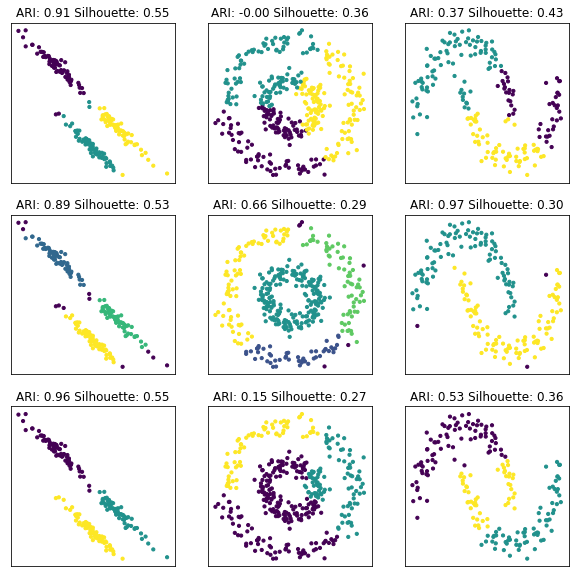

In [11]:
fig, axes = plt.subplots(3, 3, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 10))
agg = AgglomerativeClustering(n_clusters=3, connectivity=lambda x: kneighbors_graph(x, 10))
for axes2, alg in zip(axes, [KMeans(n_clusters=3), DBSCAN(eps=.3), agg]):
    for ax, (X, y) in zip(axes2, [(X_blobs, y_blobs), (X_circles, y_circles), (X_moons, y_moons)]):
        alg.fit(X)
        ax.scatter(X[:, 0], X[:, 1], c=alg.labels_, s=10)
        #ax.set_aspect("equal")
        ari = adjusted_rand_score(y, alg.labels_)
        silhouette = silhouette_score(X, alg.labels_)
        ax.set_title("ARI: {:.2f} Silhouette: {:.2f}".format(ari, silhouette))


In [12]:
from sklearn.metrics import silhouette_samples

def silhouette_plot(X, cluster_labels, ax=None):
    silhouette_scores = silhouette_samples(X, cluster_labels)
    if ax is None:
        ax = plt.gca()
    y_lower = 10
    inliers = cluster_labels != -1
    X = X[inliers]
    cluster_labels = cluster_labels[inliers]
    silhouette_scores = silhouette_scores[inliers]
    labels = np.unique(cluster_labels)
    cm = plt.cm.Vega10 if len(labels) <= 10 else plt.cm.Vega20
    for i in labels:
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            silhouette_scores[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm(i)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

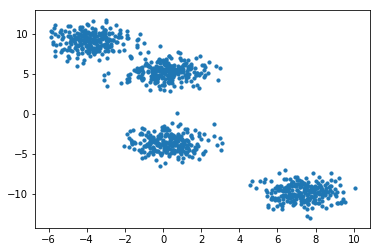

In [13]:
    X, y = make_blobs(n_samples=1000, centers=4, random_state=14)
plt.scatter(X[:, 0], X[:, 1], s=10)

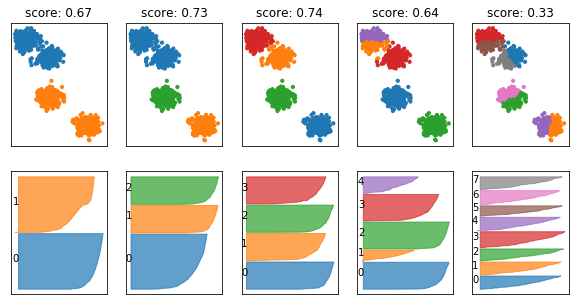

In [14]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 5))
for ax, n_clusters in zip(axes.T, [2, 3, 4, 5, 8]):
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    ax[0].scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(km.labels_), s=10)
    silhouette_plot(X, km.labels_, ax=ax[1])
    ax[0].set_title("score: {:.2f}".format(silhouette_score(X, km.labels_)))

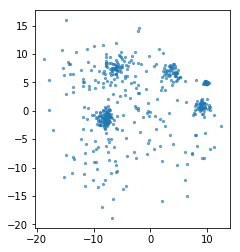

In [15]:
rng = np.random.RandomState(1)
X, y = make_blobs(n_samples=500, centers=10, random_state=rng, cluster_std=[rng.gamma(2) for i in range(10)])
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=.6)
plt.gca().set_aspect("equal")
#plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(y), s=5, alpha=.6)
xlim = plt.xlim()

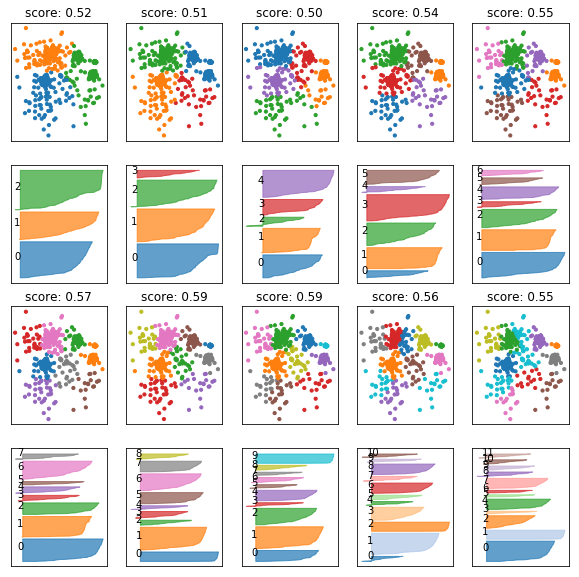

In [16]:
fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 10))
axes = np.hstack([axes[:2], axes[2:]]).T

for ax, n_clusters in zip(axes, range(3, 13)):
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    ax[0].scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(km.labels_), s=10)
    silhouette_plot(X, km.labels_, ax=ax[1])
    ax[0].set_title("score: {:.2f}".format(silhouette_score(X, km.labels_)))

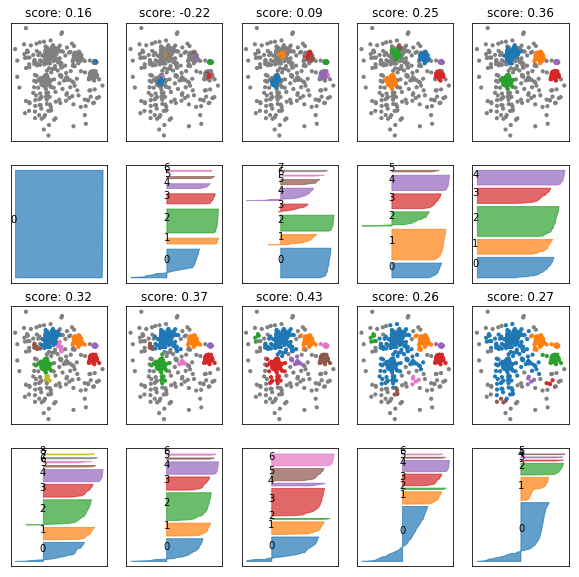

In [17]:
fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 10))
axes = np.hstack([axes[:2], axes[2:]]).T

for ax, eps in zip(axes, np.linspace(0.1, 2, 10)):
    db = DBSCAN(eps=eps)
    db.fit(X)
    colors = plt.cm.Vega10(db.labels_)
    colors[db.labels_ == -1] = [.5, .5, .5, 1]
    ax[0].scatter(X[:, 0], X[:, 1], c=colors, s=10)
    silhouette_plot(X, db.labels_, ax=ax[1])
    ax[0].set_title("score: {:.2f}".format(silhouette_score(X, db.labels_)))

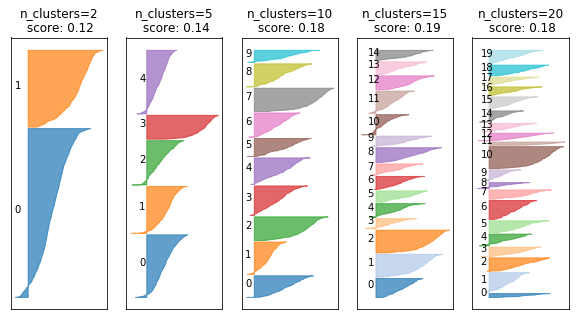

In [18]:
fig, axes = plt.subplots(1, 5, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 5))
for ax, n_clusters in zip(axes, [2, 5, 10, 15, 20]):
    km = KMeans(n_clusters=n_clusters)
    km.fit(digits.data)
    silhouette_plot(digits.data, km.labels_, ax=ax)
    ax.set_title("n_clusters={}\n score: {:.2f}".format(n_clusters, silhouette_score(digits.data, km.labels_)))

# Cluster Stability

In [19]:
from sklearn.base import clone
from sklearn.utils import check_random_state

def cluster_stability(X, est, n_iter=20, random_state=None):
    labels = []
    indices = []
    for i in range(n_iter):
        # draw bootstrap samples, store indices
        sample_indices = rng.randint(0, X.shape[0], X.shape[0])
        indices.append(sample_indices)
        est = clone(est)
        if hasattr(est, "random_state"):
            # randomize estimator if possible
            est.random_state = rng.randint(1e5)
        X_bootstrap = X[sample_indices]
        est.fit(X_bootstrap)
        # store clustering outcome using original indices
        relabel = -np.ones(X.shape[0], dtype=np.int)
        relabel[sample_indices] = est.labels_
        labels.append(relabel)
    scores = []
    for l, i in zip(labels, indices):
        for k, j in zip(labels, indices):
            # we also compute the diagonal which is a bit silly
            in_both = np.intersect1d(i, j)
            scores.append(adjusted_rand_score(l[in_both], k[in_both]))
    return np.mean(scores)

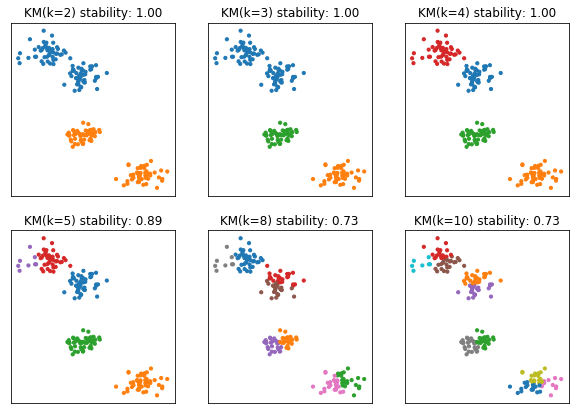

In [20]:
X, y = make_blobs(n_samples=200, centers=4, random_state=14)

fig, axes = plt.subplots(2, 3, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 7))
for ax, n_clusters in zip(axes.ravel(), [2, 3, 4, 5, 8, 10]):
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    ax.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(km.labels_), s=10)
    ax.set_title("KM(k={}) stability: {:.2f}".format(n_clusters, cluster_stability(X, KMeans(n_clusters=n_clusters, n_init=10), n_iter=20)))

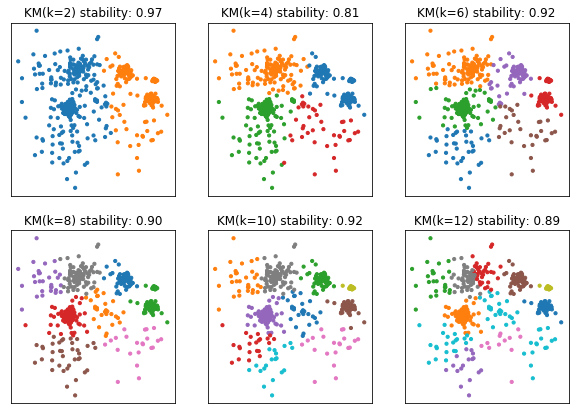

In [21]:
rng = np.random.RandomState(1)
X, y = make_blobs(n_samples=500, centers=10, random_state=rng, cluster_std=[rng.gamma(2) for i in range(10)])

fig, axes = plt.subplots(2, 3, subplot_kw={'xticks': (), 'yticks':()}, figsize=(10, 7))
for ax, n_clusters in zip(axes.ravel(), [2, 4, 6, 8, 10, 12]):
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    ax.scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(km.labels_), s=10)
    ax.set_title("KM(k={}) stability: {:.2f}".format(n_clusters, cluster_stability(X, KMeans(n_clusters=n_clusters, n_init=10))))

In [22]:
stability = []
silhouette = []
ari = []
cluster_range = range(2, 30, 2)
for n_clusters in cluster_range:
    km = KMeans(n_clusters=n_clusters)
    stability.append(cluster_stability(digits.data, km))
    km.fit(digits.data)
    silhouette.append(silhouette_score(digits.data, km.labels_))
    ari.append(adjusted_rand_score(digits.target, km.labels_))

Text(0.5,1,'Scanning n_clusters with different scores')

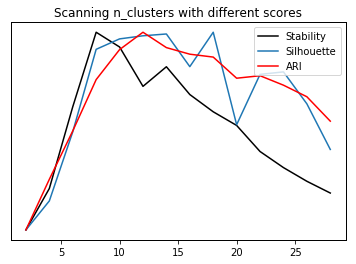

In [23]:
st, = plt.plot(cluster_range, stability, label="stability", c='k')
plt.yticks(())

si, = plt.twinx().plot(cluster_range, silhouette, label="silhouette")
plt.yticks(())

ar, = plt.twinx().plot(cluster_range, ari, label="ari", c='r')
plt.yticks(())
plt.legend([st, si, ar], ["Stability", "Silhouette", "ARI"])
plt.xlabel("n_clusters")
plt.title("Scanning n_clusters with different scores")

Text(0.5,1,'Scanning n_clusters with different scores')

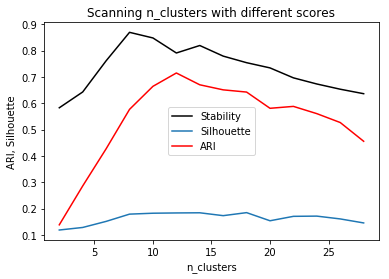

In [24]:
st, = plt.plot(cluster_range, stability, label="stability", c='k')
plt.ylabel("stability")
#plt.yticks(())

si, = plt.plot(cluster_range, silhouette, label="silhouette")
plt.ylabel("ARI, Silhouette")
#plt.yticks(())

ar, = plt.plot(cluster_range, ari, label="ari", c='r')
#plt.yticks(())
plt.legend([st, si, ar], ["Stability", "Silhouette", "ARI"])
plt.xlabel("n_clusters")
plt.title("Scanning n_clusters with different scores")

In [25]:
# stability for different clustering algorithms on digits
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

km_stability = []
agg_stability = []

dbscan_stability = []
X = PCA(n_components=.9).fit_transform(digits.data / 16.)


cluster_range = range(2, 26, 2)
for n_clusters in cluster_range:
    print(n_clusters)
    km = KMeans(n_clusters=n_clusters, n_init=10, init="random")
    km_stability.append(cluster_stability(X, km))
    agg_stability.append(cluster_stability(X, AgglomerativeClustering(n_clusters=n_clusters)))


2
4
6
8
10
12
14
16
18
20
22
24


In [26]:
db_stability = []
n_clusters_db = []
for eps in np.linspace(.2, 2, 20):
    print(eps)
    db_stability.append(cluster_stability(X, DBSCAN(eps=eps)))
    n_clusters_db.append(len(np.unique(DBSCAN(eps=eps).fit(X).labels_)))

0.2
0.294736842105
0.389473684211
0.484210526316
0.578947368421
0.673684210526
0.768421052632
0.863157894737
0.957894736842
1.05263157895
1.14736842105
1.24210526316
1.33684210526
1.43157894737
1.52631578947
1.62105263158
1.71578947368
1.81052631579
1.90526315789
2.0


Text(0,0.5,'stability')

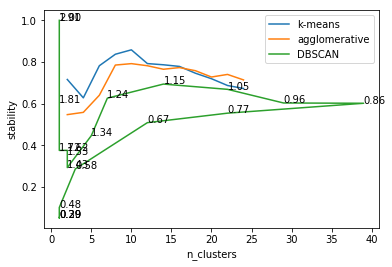

In [27]:
cluster_range = range(2, 26, 2)

plt.plot(cluster_range, km_stability, label="k-means")
plt.plot(cluster_range, agg_stability, label="agglomerative")
plt.plot(n_clusters_db, db_stability, label="DBSCAN")
for eps, n_clusters, stability in zip(np.linspace(.2, 2, 20), n_clusters_db, db_stability):
    plt.text(n_clusters, stability, "{:.2f}".format(eps))
plt.legend()
plt.xlabel("n_clusters")
plt.ylabel("stability")

In [28]:
from sklearn.manifold import TSNE
X_tsne = TSNE().fit_transform(digits.data / 16.)

Text(0,0.5,'TSNE')

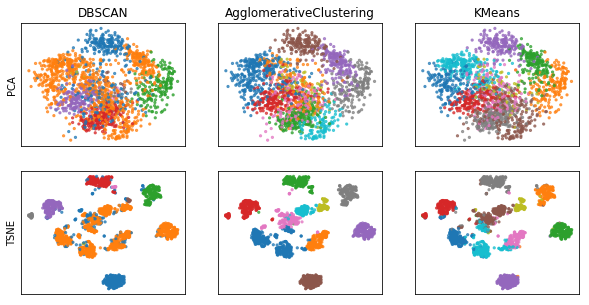

In [29]:


fig, axes = plt.subplots(2, 3, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(10, 5))
for ax, est in zip(axes.T, [DBSCAN(eps=1.2), AgglomerativeClustering(n_clusters=10), KMeans(n_clusters=10)]):
    est.fit(X)
    # X is PCA components
    ax[0].set_title(est.__class__.__name__)
    ax[0].scatter(X[:, 0], X[:, 1], c=plt.cm.Vega10(est.labels_), s=5, alpha=.7)
    ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=plt.cm.Vega10(est.labels_), s=5, alpha=.7)

axes[0, 0].set_ylabel("PCA")
axes[1, 0].set_ylabel("TSNE")

array([552, 163, 114, 161,  27, 144,  42, 121,  86, 122,  11,  76,   4,
        56,   7,   7,   7,  10,  24,   7,   4,   8,  13,  12,   3,  11,   5])

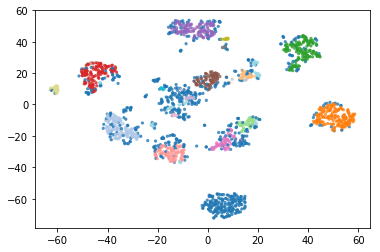

In [30]:
dbscan = DBSCAN(eps=1.0, min_samples=5).fit(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=plt.cm.Vega20(dbscan.labels_), s=5, alpha=.7)
np.bincount(dbscan.labels_ + 1)

Text(0.5,0.98,'K-Means cluster centers')

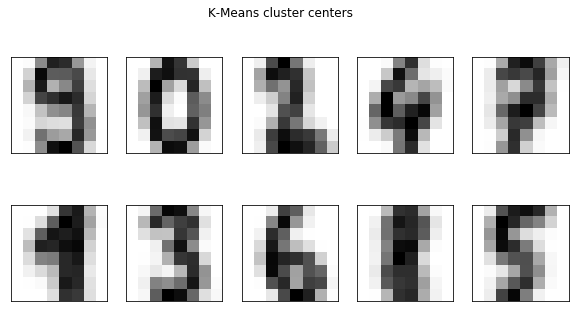

In [31]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(10, 5))
km = KMeans(n_clusters=10).fit(digits.data)
for ax, center in zip(axes.ravel(), km.cluster_centers_):
    ax.imshow(center.reshape(8, 8), cmap='gray_r')
fig.suptitle("K-Means cluster centers")

In [32]:
agg = AgglomerativeClustering(n_clusters=10).fit(digits.data)

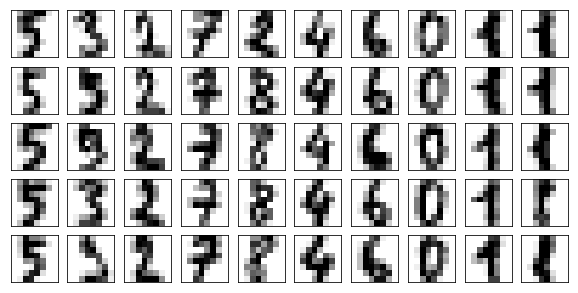

In [33]:
fig, axes = plt.subplots(5, 10, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(10, 5))
for ax, center in zip(axes.T, range(10)):
    cluster_mask = agg.labels_ == center
    for a, im in zip(ax, digits.data[cluster_mask]):
        a.imshow(im.reshape(8, 8), cmap='gray_r')

In [34]:
# PCA is not really neccessary but we know a good eps value
# when using PCA.
X = PCA(n_components=.9).fit_transform(digits.data / 16.)

dbscan = DBSCAN(eps=1.2).fit(X)

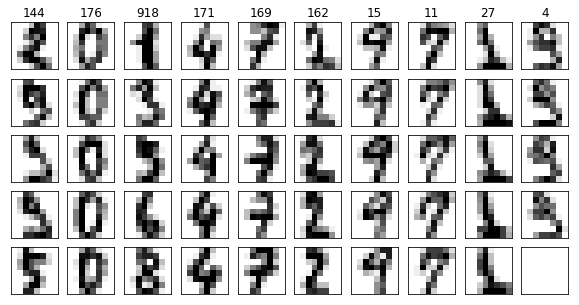

In [35]:
clusters = np.unique(dbscan.labels_)
n_clusters = len(clusters)
fig, axes = plt.subplots(5, n_clusters, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(10, 5))
for ax, center in zip(axes.T, clusters):
    cluster_mask = dbscan.labels_ == center
    ax[0].set_title(np.sum(cluster_mask))
    for a, im in zip(ax, digits.data[cluster_mask]):
        a.imshow(im.reshape(8, 8), cmap='gray_r')

# adult

In [37]:

import os
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
adult_path = os.path.join("adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
data = data.drop("fnlwgt", axis=1)
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [38]:
data_ = data.drop("income", axis=1)
categorical = data_.columns[data_.dtypes != "int64"]
data_dummies = pd.get_dummies(data_[categorical],
                                        columns=categorical)

In [39]:
data_dummies.shape

(32561, 102)

In [40]:
# subsample the data. Still takes a while. Maybe MiniBatchKMeans would be more appropriate
X = data_dummies.values
X = scale(X)

/home/andy/checkout/scikit-learn/sklearn/utils/validation.py:558: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [41]:
adult_pca = PCA(n_components=2).fit_transform(X)

In [42]:
km = KMeans(n_clusters=3).fit(X)

In [43]:
km.labels_

array([1, 2, 1, ..., 1, 1, 1], dtype=int32)

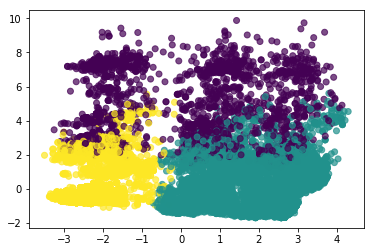

In [44]:
plt.scatter(adult_pca[:, 0], adult_pca[:, 1], c=km.labels_, alpha=.7)

In [46]:
stability = []
silhouette = []
ari = []
cluster_range = range(2, 15, 2)
for n_clusters in cluster_range:
    print(n_clusters)
    km = KMeans(n_clusters=n_clusters)
    stability.append(cluster_stability(X, km, n_iter=10))
    km.fit(X)
    silhouette.append(silhouette_score(X, km.labels_))
    ari.append(adjusted_rand_score(data.income, km.labels_))
FIXME?! crashes?

2
4


KeyboardInterrupt: 

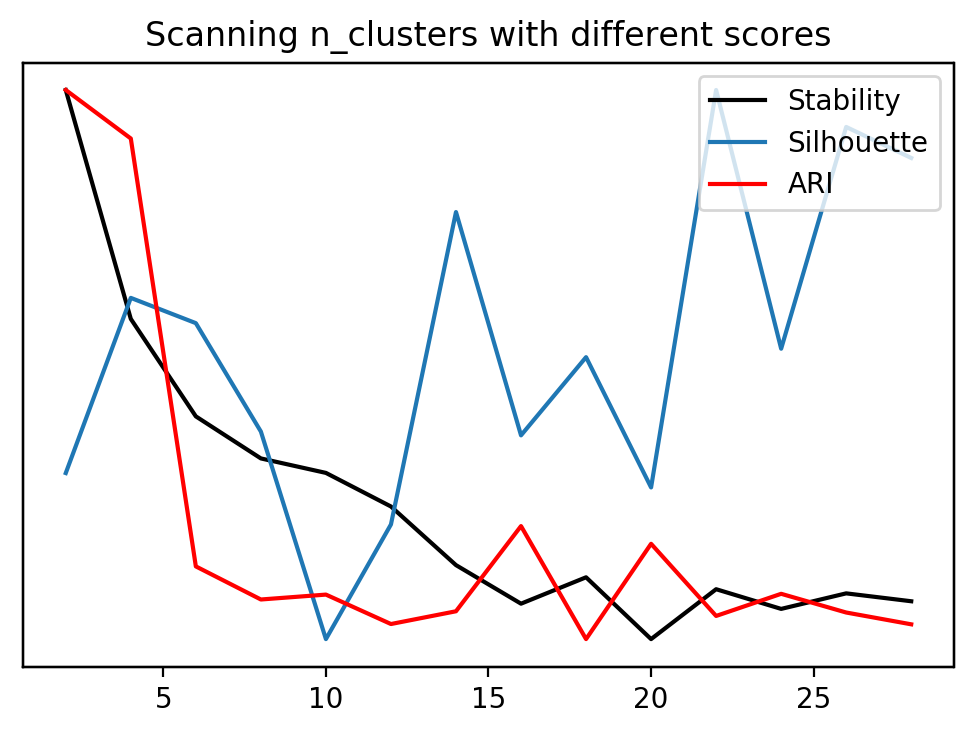

In [145]:
st, = plt.plot(cluster_range, stability, label="stability", c='k')
plt.yticks(())

si, = plt.twinx().plot(cluster_range, silhouette, label="silhouette")
plt.yticks(())

ar, = plt.twinx().plot(cluster_range, ari, label="ari", c='r')
plt.yticks(())
plt.legend([st, si, ar], ["Stability", "Silhouette", "ARI"])
plt.xlabel("n_clusters")
plt.title("Scanning n_clusters with different scores")

# Breast Cancer

In [47]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [52]:
X = data.data
stability = []
silhouette = []
ari = []
cluster_range = range(2, 30, 2)
for n_clusters in cluster_range:
    km = KMeans(n_clusters=n_clusters, n_init=10, init="random")
    stability.append(cluster_stability(X, km, n_iter=10))
    km.fit(X)
    silhouette.append(silhouette_score(X, km.labels_))
    ari.append(adjusted_rand_score(data.target, km.labels_))

/home/andy/checkout/scikit-learn/sklearn/cluster/k_means_.py:909: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/andy/checkout/scikit-learn/sklearn/cluster/k_means_.py:909: ConvergenceWarning: Number of distinct clusters (21) found smaller than n_clusters (22). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/andy/checkout/scikit-learn/sklearn/cluster/k_means_.py:909: ConvergenceWarning: Number of distinct clusters (21) found smaller than n_clusters (22). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/andy/checkout/scikit-learn/sklearn/cluster/k_means_.py:909: ConvergenceWarning: Number of distinct clusters (25) found smaller than n_clusters (26). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/andy/checkout/scikit-learn/sklearn/cluster/k_means_.py:909: ConvergenceWarning: Number of distinct clusters (27) found smaller tha

Text(0.5,1,'Scanning n_clusters with different scores')

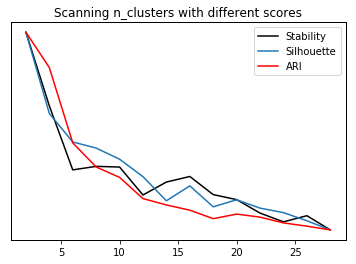

In [53]:
st, = plt.plot(cluster_range, stability, label="stability", c='k')
plt.yticks(())

si, = plt.twinx().plot(cluster_range, silhouette, label="silhouette")
plt.yticks(())

ar, = plt.twinx().plot(cluster_range, ari, label="ari", c='r')
plt.yticks(())
plt.legend([st, si, ar], ["Stability", "Silhouette", "ARI"])
plt.xlabel("n_clusters")
plt.title("Scanning n_clusters with different scores")

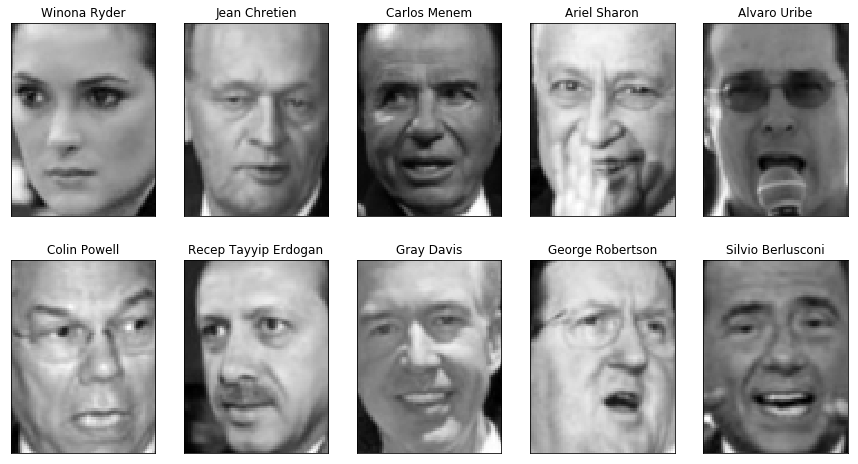

In [54]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap='gray')
    ax.set_title(people.target_names[target])

In [55]:
# have at most 50 images per preson - otherwise too much bush
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]
# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

In [56]:
from sklearn.decomposition import PCA
X = PCA(n_components=100, whiten=True).fit_transform(X_people)
stability = []
silhouette = []
ari = []
cluster_range = range(2, 50, 4)
for n_clusters in cluster_range:
    print(n_clusters)
    km = KMeans(n_clusters=n_clusters, n_init=5, init="random")
    stability.append(cluster_stability(X, km, n_iter=10))
    km.fit(X)
    silhouette.append(silhouette_score(X, km.labels_))
    ari.append(adjusted_rand_score(y_people, km.labels_))

2
6
10
14
18
22
26
30
34
38
42
46


Text(0.5,1,'Scanning n_clusters with different scores')

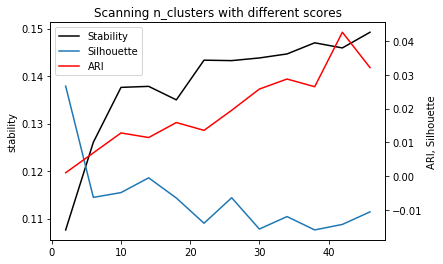

In [57]:
st, = plt.plot(cluster_range, stability, label="stability", c='k')
plt.ylabel("stability")
#plt.yticks(())

si, = plt.twinx().plot(cluster_range, silhouette, label="silhouette")
plt.ylabel("ARI, Silhouette")
#plt.yticks(())

ar, = plt.plot(cluster_range, ari, label="ari", c='r')
#plt.yticks(())
plt.legend([st, si, ar], ["Stability", "Silhouette", "ARI"])
plt.xlabel("n_clusters")
plt.title("Scanning n_clusters with different scores")

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

km = KMeans(n_init=1, init="random")
pipe = make_pipeline(km, LogisticRegression())

param_grid = {'kmeans__n_clusters': [10, 50, 100, 200, 500]}
grid = GridSearchCV(pipe, param_grid, cv=5, verbose=True)
grid.fit(X, y_people)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  7.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('kmeans', KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=8, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)), ('logisticregression', LogisticRegression(C=1.0, class_weight=N...y='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kmeans__n_clusters': [10, 50, 100, 200, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

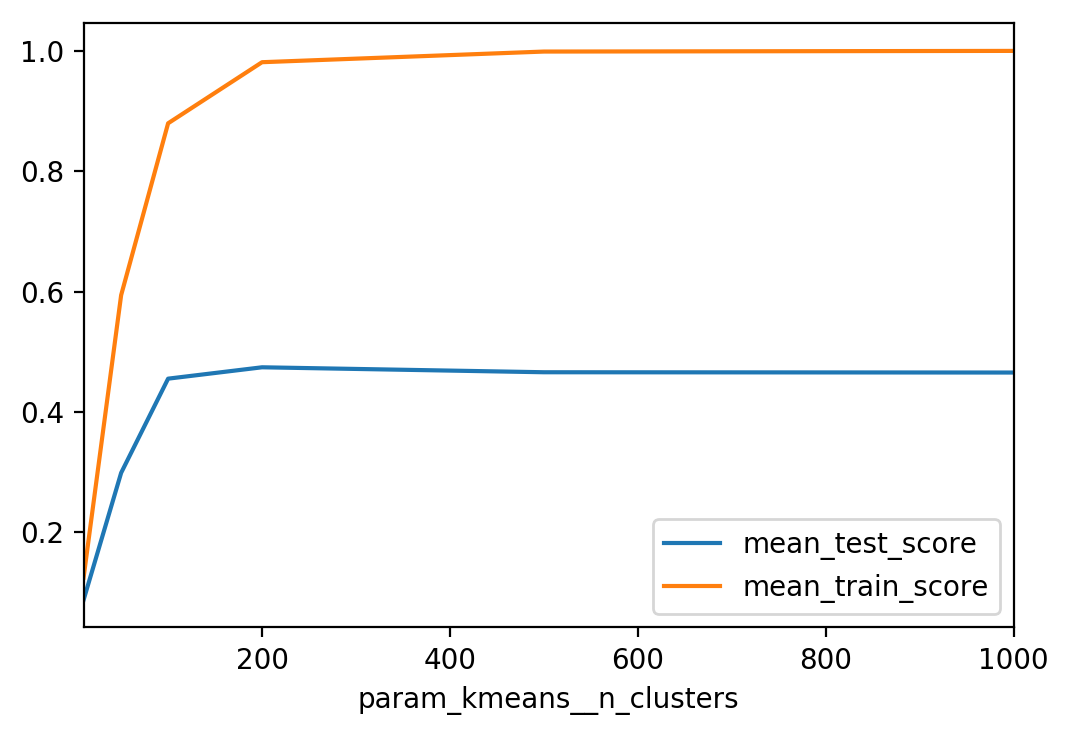

In [145]:
results = pd.DataFrame(grid.cv_results_)
res_pivot = results.pivot_table(values=['mean_test_score', 'mean_train_score'],
                                index="param_kmeans__n_clusters")
res_pivot.plot()

In [58]:
bank_notes = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", header=None)

In [59]:
bank_data = bank_notes.drop(4, axis=1)

/home/andy/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71255e7f60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7126f303c8>]], dtype=object)

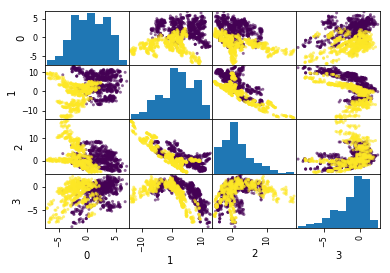

In [60]:
pd.plotting.scatter_matrix(bank_data, c=bank_notes[4], alpha=.6)

In [61]:
bla = PCA().fit_transform(scale(bank_data))

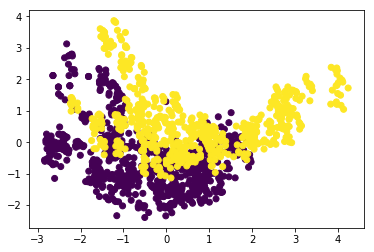

In [62]:
plt.scatter(bla[:, 0], bla[:, 1], c=bank_notes[4])

In [63]:
bank_tsne = TSNE(perplexity=400).fit_transform(scale(bank_data))

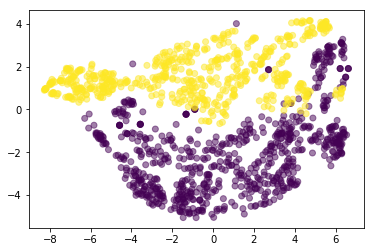

In [64]:
plt.scatter(bank_tsne[:, 0], bank_tsne[:, 1], c=bank_notes[4], alpha=.5)

In [65]:
X = scale(bank_data)
y = bank_notes[4]
stability = []
silhouette = []
ari = []
cluster_range = range(2, 30, 2)
for n_clusters in cluster_range:
    km = KMeans(n_clusters=n_clusters, n_init=10, init="random")
    stability.append(cluster_stability(X, km))
    km.fit(X)
    silhouette.append(silhouette_score(X, km.labels_))
    ari.append(adjusted_rand_score(y, km.labels_))

Text(0.5,1,'Scanning n_clusters with different scores')

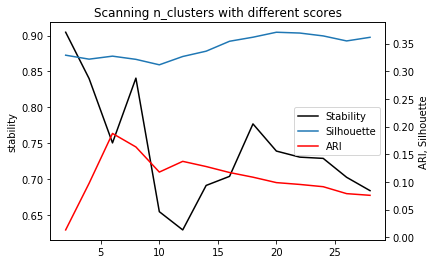

In [66]:
st, = plt.plot(cluster_range, stability, label="stability", c='k')
plt.ylabel("stability")
#plt.yticks(())

si, = plt.twinx().plot(cluster_range, silhouette, label="silhouette")
plt.ylabel("ARI, Silhouette")
#plt.yticks(())

ar, = plt.plot(cluster_range, ari, label="ari", c='r')
#plt.yticks(())
plt.legend([st, si, ar], ["Stability", "Silhouette", "ARI"])
plt.xlabel("n_clusters")
plt.title("Scanning n_clusters with different scores")